In [644]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Import Data

In [645]:
def read_data():
    return pd.read_excel("output.xlsx")
main_data=read_data()
main_data.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,ReturnOrderCount,DiscountCount,Recency,Frequency,Monetary
0,88499,4,1329,9,3,8,9,9,1,1,1,0,214,11,5280000
1,88856,22,6,172,18,7,0,9,3,12,18,16,8,2,139362000
2,90671,10,0,20,2,8,8,9,1,0,0,12,77,42,4316000
3,90843,5,789,8,3,8,8,9,1,0,0,4,132,42,6033500
4,92021,6,1774,9,3,8,8,9,2,0,1,7,173,1,5713000


In [646]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9524 entries, 0 to 9523
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   UserID                      9524 non-null   int64
 1   CategoryCount               9524 non-null   int64
 2   RegisterToOrderGapAge       9524 non-null   int64
 3   OrderCount                  9524 non-null   int64
 4   QuestionCount               9524 non-null   int64
 5   NPSSainaScoreAverage        9524 non-null   int64
 6   NPSDoctorScoreAverage       9524 non-null   int64
 7   QuestionRatingScoreAverage  9524 non-null   int64
 8   PlanTypeCount               9524 non-null   int64
 9   UnfulfillmentOrderCount     9524 non-null   int64
 10  ReturnOrderCount            9524 non-null   int64
 11  DiscountCount               9524 non-null   int64
 12  Recency                     9524 non-null   int64
 13  Frequency                   9524 non-null   int64
 14  Monetary

## Recency Kmeans Cluster

In [647]:
def stds_cluster(df):
    stds=StandardScaler()
    r_std=pd.DataFrame(stds.fit_transform(df.iloc[:,[12]]),columns=df.iloc[:,[12]].columns) 
    kmeans=KMeans(n_clusters=5 ,init = 'k-means++', random_state = 42)
    Y_kmeans=kmeans.fit_predict(r_std)
    df["recency_cluster"]=Y_kmeans
    return df ,Y_kmeans ,kmeans
Recency_stds , Y_kmeans ,kmeans = stds_cluster(main_data)
Recency_stds.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,ReturnOrderCount,DiscountCount,Recency,Frequency,Monetary,recency_cluster
0,88499,4,1329,9,3,8,9,9,1,1,1,0,214,11,5280000,1
1,88856,22,6,172,18,7,0,9,3,12,18,16,8,2,139362000,2
2,90671,10,0,20,2,8,8,9,1,0,0,12,77,42,4316000,4
3,90843,5,789,8,3,8,8,9,1,0,0,4,132,42,6033500,3
4,92021,6,1774,9,3,8,8,9,2,0,1,7,173,1,5713000,3


In [648]:
recency_describe=Recency_stds[["Recency","recency_cluster"]].groupby(["recency_cluster"]).describe()
recency_describe


Recency                                                     \
                  count        mean        std    min    25%    50%    75%   
recency_cluster                                                              
0                1952.0  105.027152  13.746694   82.0   93.0  105.0  117.0   
1                1825.0  202.887123  37.381558  179.0  189.0  200.0  212.0   
2                2026.0   17.013820  11.282842    0.0    7.0   16.0   27.0   
3                1859.0  154.444325  14.469317  130.0  142.0  155.0  168.0   
4                1862.0   58.682062  12.447327   38.0   48.0   58.0   69.0   

                         
                    max  
recency_cluster          
0                 129.0  
1                1225.0  
2                  37.0  
3                 178.0  
4                  81.0

## Recency Cluster Visualization

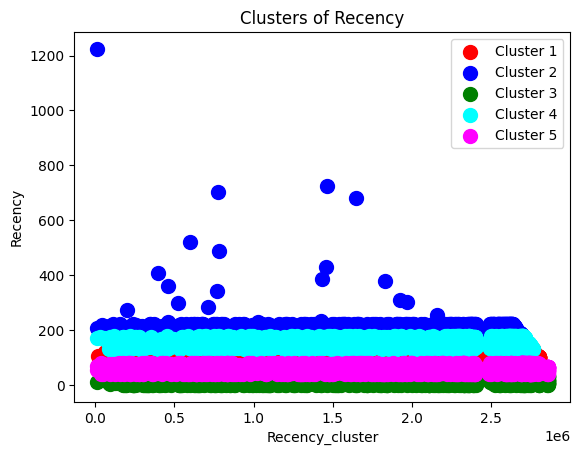

In [649]:
#Y=Recency_stds.iloc[:,[0,15]]
X=Recency_stds.iloc[:,[0,12]].values


plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100,
            c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100,
            c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100,
            c = 'green', label = 'Cluster 3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100,
            c = 'cyan', label = 'Cluster 4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100,
            c = 'magenta', label = 'Cluster 5')

# plt.scatter(kmeans.cluster_centers_[:,0],
#             kmeans.cluster_centers_[:,1],
#             s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Recency')
plt.xlabel('Recency_cluster')
plt.ylabel('Recency')
plt.legend()
plt.show()

## Frequency Kmeans cluster

In [650]:
def stds_cluster(df):
    stds=StandardScaler()
    r_std=pd.DataFrame(stds.fit_transform(df.iloc[:,[13]]),columns=df.iloc[:,[13]].columns) 
    kmeans=KMeans(n_clusters=5 ,init = 'k-means++', random_state = 42)
    Y_kmeans=kmeans.fit_predict(r_std)
    df["frequency_cluster"]=Y_kmeans
    return df,kmeans ,Y_kmeans
Frequency_stds, kmeans, Y_kmeans=stds_cluster(main_data)
Frequency_stds.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,ReturnOrderCount,DiscountCount,Recency,Frequency,Monetary,recency_cluster,frequency_cluster
0,88499,4,1329,9,3,8,9,9,1,1,1,0,214,11,5280000,1,4
1,88856,22,6,172,18,7,0,9,3,12,18,16,8,2,139362000,2,2
2,90671,10,0,20,2,8,8,9,1,0,0,12,77,42,4316000,4,1
3,90843,5,789,8,3,8,8,9,1,0,0,4,132,42,6033500,3,1
4,92021,6,1774,9,3,8,8,9,2,0,1,7,173,1,5713000,3,2


In [651]:
Frequency_stds[["Frequency","frequency_cluster"]].groupby(["frequency_cluster"]).describe()

Frequency                                                   
                      count       mean       std   min   25%   50%   75%   max
frequency_cluster                                                             
0                    1985.0  20.236776  3.500915  15.0  17.0  20.0  23.0  26.0
1                    1539.0  46.845354  3.683972  41.0  44.0  47.0  50.0  60.0
2                    2122.0   2.118285  1.677613   0.0   1.0   2.0   4.0   5.0
3                    2028.0  33.222387  4.004727  27.0  30.0  33.0  37.0  40.0
4                    1850.0   9.671892  2.641131   6.0   7.0   9.5  12.0  14.0

## Frequency Cluster Visualization

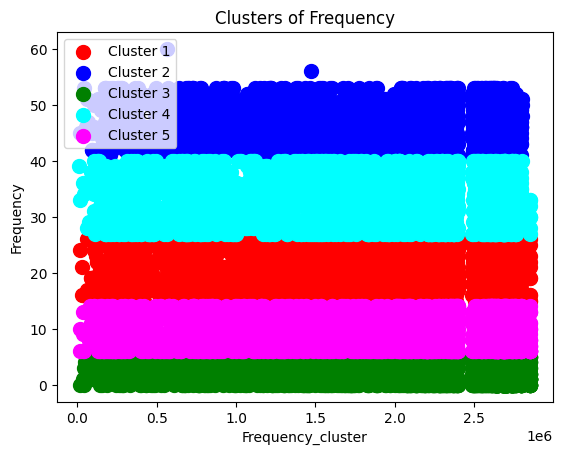

In [652]:
X=Frequency_stds.iloc[:,[0,13]].values

plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100,
            c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100,
            c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100,
            c = 'green', label = 'Cluster 3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100,
            c = 'cyan', label = 'Cluster 4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100,
            c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of Frequency')
plt.xlabel('Frequency_cluster')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Monetary Kmeans Cluster

In [653]:
def stds_cluster(df):
    stds=StandardScaler()
    r_std=pd.DataFrame(stds.fit_transform(df.iloc[:,[14]]),columns=df.iloc[:,[14]].columns) 
    kmeans=KMeans(n_clusters=5 ,init = 'k-means++', random_state = 42)
    Y_kmeans=kmeans.fit_predict(r_std)
    df["monetary_cluster"]=Y_kmeans
    return df,kmeans ,Y_kmeans
Monetary_stds,kmeans , Y_kmeans=stds_cluster(main_data)
Monetary_stds.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,ReturnOrderCount,DiscountCount,Recency,Frequency,Monetary,recency_cluster,frequency_cluster,monetary_cluster
0,88499,4,1329,9,3,8,9,9,1,1,1,0,214,11,5280000,1,4,0
1,88856,22,6,172,18,7,0,9,3,12,18,16,8,2,139362000,2,2,3
2,90671,10,0,20,2,8,8,9,1,0,0,12,77,42,4316000,4,1,0
3,90843,5,789,8,3,8,8,9,1,0,0,4,132,42,6033500,3,1,0
4,92021,6,1774,9,3,8,8,9,2,0,1,7,173,1,5713000,3,2,0


In [654]:
Monetary_stds[["Monetary","monetary_cluster"]].groupby(["monetary_cluster"]).describe()

Monetary                                           \
                    count          mean           std          min   
monetary_cluster                                                     
0                  9105.0  4.545509e+06  1.236539e+06          0.0   
1                   357.0  6.861484e+07  1.248509e+07   52584500.0   
2                     2.0  6.408072e+08  1.993850e+07  626708500.0   
3                    52.0  1.305453e+08  2.660192e+07   99829500.0   
4                     8.0  3.133627e+08  8.490650e+07  237227000.0   

                                                                      
                          25%          50%          75%          max  
monetary_cluster                                                      
0                   3705500.0    4560000.0    5514000.0   23547500.0  
1                  57920000.0   65760000.0   76660000.0   99095500.0  
2                 633757825.0  640807150.0  647856475.0  654905800.0  
3                 109142500.0  121765750.0  147891750.0  191293000.0  
4                 263760625.0  279766500.0  337971625.0  450178500.0

## Monetary Cluster Visualization

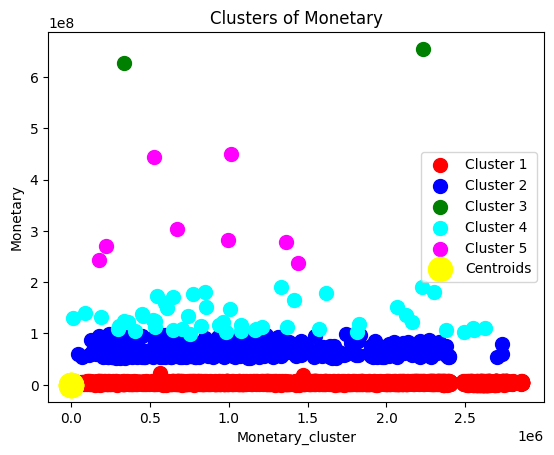

In [655]:
X=Monetary_stds.iloc[:,[0,14]].values

plt.scatter(X[Y_kmeans == 0, 0], X[Y_kmeans == 0, 1], s = 100,
            c = 'red', label = 'Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100,
            c = 'blue', label = 'Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100,
            c = 'green', label = 'Cluster 3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100,
            c = 'cyan', label = 'Cluster 4')
plt.scatter(X[Y_kmeans == 4, 0], X[Y_kmeans == 4, 1], s = 100,
            c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,[0]],
             kmeans.cluster_centers_[:,[-1]],
             s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Monetary')
plt.xlabel('Monetary_cluster')
plt.ylabel('Monetary')
plt.legend()
plt.show()

In [656]:
def recency_frequency_monetary_level(df):

    df['recency_level'] = df.iloc[:,[12]].apply((lambda x: '5' if (x>= 0).any() & (x< 38.0).any() else 
                                        '4' if (x>= 38.0).any() & (x< 82.0).any() else 
                                        '3' if (x>= 82.0).any() & (x< 130.0).any() else 
                                        '2' if (x>= 130.0).any() & (x < 179.0).any() else
                                        '1' if (x>= 179.0).any() & (x< 1226.0).any() else '0'),axis=1)

    df['frequency_level']= df.iloc[:,[13]].apply((lambda x: '1' if (x>= 0).any() & (x< 6.0).any() else 
                                        '2' if (x>= 6.0).any() & (x< 15.0).any() else 
                                        '3' if (x>= 15.0).any() & (x< 27.0).any() else 
                                        '4' if (x>= 27.0).any() & (x < 41.0).any() else
                                        '5' if (x>= 41.0).any() & (x< 61.0).any() else '0'),axis=1)


    df['monetary_level']= df.iloc[:,[14]].apply((lambda x: '1' if (x>= 0).any() & (x< 23547501.0).any() else 
                                        '2' if (x>= 52584500.0).any() & (x< 99095501.0).any() else 
                                        '3' if (x>= 99829500.0).any() & (x< 191293001.0).any() else 
                                        '4' if (x>= 237227000.0).any() & (x < 450178500.0).any() else
                                        '5' if (x>= 626708500.0).any() & (x< 654905801.0).any() else '0'),axis=1)
    
    df['RFM_Score'] = df.iloc[:,18:21].sum(axis=1)
    return df

rfm_level=recency_frequency_monetary_level(main_data)
rfm_level.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,...,Recency,Frequency,Monetary,recency_cluster,frequency_cluster,monetary_cluster,recency_level,frequency_level,monetary_level,RFM_Score
0,88499,4,1329,9,3,8,9,9,1,1,...,214,11,5280000,1,4,0,1,2,1,121
1,88856,22,6,172,18,7,0,9,3,12,...,8,2,139362000,2,2,3,5,1,3,513
2,90671,10,0,20,2,8,8,9,1,0,...,77,42,4316000,4,1,0,4,5,1,451
3,90843,5,789,8,3,8,8,9,1,0,...,132,42,6033500,3,1,0,2,5,1,251
4,92021,6,1774,9,3,8,8,9,2,0,...,173,1,5713000,3,2,0,2,1,1,211


In [657]:
# Calculate RFM score by combining the individual scores
def rfm_segment_labels(df):

    # Create RFM segments based on the RFM score

    Champion=["555","554","544","545","454","455","445"]
    Loyal_Customer=["543", "444", "435", "355", "354","345","344","335"]
    Potential_Loyalist =["553","551","552","541","542","533","532","531","452","451","442","441","431","453","433","432","423","353","352","351","342","341","333","323"]
    New_Customer = ["512","511","422","421","412","411","311"]
    Promising = ["525","524","523","522","521","515","514","513","425","424","413","414","415","315","314","313"]
    Need_Attention = ["535","534","443","434","343","334","325","324"]
    Cannot_Lose_Them = ["155","154","144","214","215","115","114","113"]
    About_To_Sleep = ["331","321","312","221","213"]
    At_Risk = ["255","254","245","244","253","252","243","242","235","234","225","224","153","152","145","143","142","135","134","133","125","124"] 
    Hibernating = ["332","322","231","241","251","233","232","223","222","132","123","122","212","211"]
    Lost = ["111","112","121","131","141","151"]
    
    #discount = ["150","140","130","120","110","250","240","230","220","210","350","340","330","320","310","450","440","430","420","410","550","540","530","520","510",]


    df['RFM_Segment']= df.iloc[:,[21]].apply(lambda x: ('Champions' if  x.isin (Champion).any() else 
                                         'Loyal_Customer' if x.isin (Loyal_Customer).any() else
                                         'Potential_Loyalist' if x.isin (Potential_Loyalist).any() else
                                         'New_Customer' if x.isin (New_Customer).any() else
                                         'Promising'  if x.isin (Promising).any() else
                                         'Need_Attention' if x.isin (Need_Attention).any() else
                                         'Cannot_Lose_Them' if x.isin (Cannot_Lose_Them).any() else
                                         'About_To_Sleep' if x.isin (About_To_Sleep).any() else
                                         'At_Risk' if x.isin (At_Risk).any() else
                                         'Hibernating' if x.isin (Hibernating).any() else
                                         'Lost' if x.isin (Lost).any() else '-'),axis=1)
    
    return df
RFM_segment= rfm_segment_labels(rfm_level)
RFM_segment.head()

,UserID,CategoryCount,RegisterToOrderGapAge,OrderCount,QuestionCount,NPSSainaScoreAverage,NPSDoctorScoreAverage,QuestionRatingScoreAverage,PlanTypeCount,UnfulfillmentOrderCount,...,Frequency,Monetary,recency_cluster,frequency_cluster,monetary_cluster,recency_level,frequency_level,monetary_level,RFM_Score,RFM_Segment
0,88499,4,1329,9,3,8,9,9,1,1,...,11,5280000,1,4,0,1,2,1,121,Lost
1,88856,22,6,172,18,7,0,9,3,12,...,2,139362000,2,2,3,5,1,3,513,Promising
2,90671,10,0,20,2,8,8,9,1,0,...,42,4316000,4,1,0,4,5,1,451,Potential_Loyalist
3,90843,5,789,8,3,8,8,9,1,0,...,42,6033500,3,1,0,2,5,1,251,Hibernating
4,92021,6,1774,9,3,8,8,9,2,0,...,1,5713000,3,2,0,2,1,1,211,Hibernating


## Count Of RFM Category

In [658]:
RFM_segment.groupby("RFM_Segment")["RFM_Segment"].count()

RFM_Segment
-                        1
About_To_Sleep        1166
Cannot_Lose_Them         1
Hibernating           1511
Lost                  1819
New_Customer          1494
Potential_Loyalist    3048
Promising              484
Name: RFM_Segment, dtype: int64